In [1]:
%matplotlib inline

from IPython.html.widgets import interact, interactive

from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np

import glob

from __future__ import print_function

:0: FutureWarning: IPython widgets are experimental and may change in the future.


timestep:  0
size:  252 (in each direction)


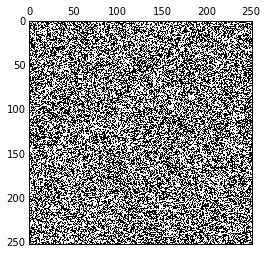

In [9]:
filenames = glob.glob("data/step_*.dat")
num_files = len(filenames)

filename = filenames[0]

tmp = np.loadtxt(filename, dtype=np.bool_)

data = np.empty(( num_files, tmp.shape[0], tmp.shape[0] ), dtype=np.bool_)
for i, filename in enumerate(filenames):
    data[i,:,:] = np.loadtxt(filename, dtype=np.bool_)
    if (np.any(data[i,:,:])):
        max_alive_step = i
        
num_steps = min(num_files, max_alive_step+3)

def visualize_image(step=0):
    print("timestep: ", step)
    print("size: ", data.shape[2], "(in each direction)")
    plt.matshow(data[step,:,:], cmap="binary")

interact(visualize_image,
        step=(0,num_steps-1))

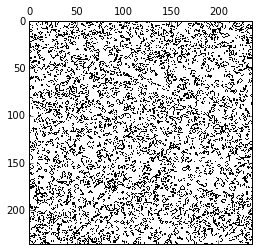

In [6]:
fig, ax = plt.subplots()
img = ax.matshow(data[0,:,:], cmap="binary")

def update_img(step):
    img.set_data(data[step,:,:])
    return img

anim = animation.FuncAnimation(fig, update_img, frames=num_steps)
anim.save("animation.mp4")


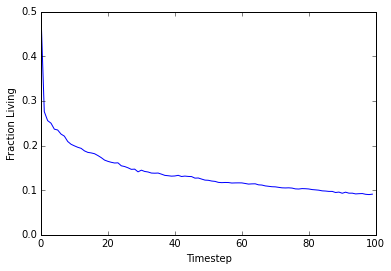

In [22]:
living_frac = np.empty(num_files)
for i in range(num_files):
    living_frac[i] = np.sum(data[i,:,:]) / data[i,:,:].size

plt.plot(living_frac)
plt.ylim(ymin=0)
plt.xlabel("Timestep")
plt.ylabel("Fraction Living")